In [1]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import libraries
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


In [4]:
url = (r'C:\Users\Ramoraswi\Downloads\country_boundaries_v2.json')
geoJson = gpd.read_file(url)
geoJson

,SOVEREIGNT,TYPE,ADMIN,NAME,NAME_LONG,FORMAL_EN,POP_EST,POP_RANK,ECONOMY,INCOME_GRP,CONTINENT,SUBREGION,REGION_WB,LABEL_X,LABEL_Y,geometry
0,Fiji,Sovereign country,Fiji,Fiji,Fiji,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,Oceania,Melanesia,East Asia & Pacific,177.975427,-17.826099,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,Sovereign country,United Republic of Tanzania,Tanzania,Tanzania,United Republic of Tanzania,58005463.0,16,7. Least developed region,5. Low income,Africa,Eastern Africa,Sub-Saharan Africa,34.959183,-6.051866,"MULTIPOLYGON (((33.90371 -0.95000, 34.07262 -1..."
2,Western Sahara,Indeterminate,Western Sahara,W. Sahara,Western Sahara,Sahrawi Arab Democratic Republic,603253.0,11,7. Least developed region,5. Low income,Africa,Northern Africa,Middle East & North Africa,-12.630304,23.967592,"MULTIPOLYGON (((-8.66559 27.65643, -8.66512 27..."
3,Canada,Sovereign country,Canada,Canada,Canada,Canada,37589262.0,15,1. Developed region: G7,1. High income: OECD,North America,Northern America,North America,-101.910700,60.324287,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,Country,United States of America,United States of America,United States,United States of America,328239523.0,17,1. Developed region: G7,1. High income: OECD,North America,Northern America,North America,-97.482602,39.538479,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Republic of Serbia,Sovereign country,Republic of Serbia,Serbia,Serbia,Republic of Serbia,6944975.0,13,6. Developing region,3. Upper middle income,Europe,Southern Europe,Europe & Central Asia,20.787989,44.189919,"MULTIPOLYGON (((18.82982 45.90887, 18.82984 45..."
173,Montenegro,Sovereign country,Montenegro,Montenegro,Montenegro,Montenegro,622137.0,11,6. Developing region,3. Upper middle income,Europe,Southern Europe,Europe & Central Asia,19.143727,42.803101,"MULTIPOLYGON (((20.07070 42.58863, 19.80161 42..."
174,Kosovo,Disputed,Kosovo,Kosovo,Kosovo,Republic of Kosovo,1794248.0,12,6. Developing region,4. Lower middle income,Europe,Southern Europe,Europe & Central Asia,20.860719,42.593587,"MULTIPOLYGON (((20.59025 41.85541, 20.52295 42..."
175,Trinidad and Tobago,Sovereign country,Trinidad and Tobago,Trinidad and Tobago,Trinidad and Tobago,Republic of Trinidad and Tobago,1394973.0,12,6. Developing region,2. High income: nonOECD,North America,Caribbean,Latin America & Caribbean,-60.918400,10.998900,"MULTIPOLYGON (((-61.68000 10.76000, -61.10500 ..."


In [9]:
def population_class(population):
    if population['POP_EST'] >= 600000000:
        return '1. Very Superior'
    elif population['POP_EST'] >= 50000000 and population['POP_EST'] < 600000000:
        return '2. Superior'
    elif population['POP_EST'] >= 9000000 and population['POP_EST'] < 50000000:
        return '3. High Average'
    elif population['POP_EST'] >= 1000000 and population['POP_EST'] < 9000000:
        return '4. Average'
    elif population['POP_EST'] >= 900000 and population['POP_EST'] <1000000:
        return '5. Low Average'
    elif population['POP_EST'] >= 90000 and population['POP_EST'] < 900000:
        return '6. Borderline'
    elif population['POP_EST'] >= 1000:
        return '7. Extremely Low'


<AxesSubplot:>

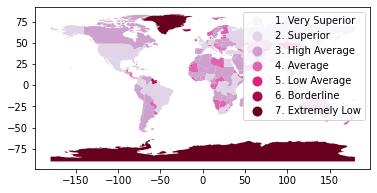

In [10]:
geoJson['population_class'] = geoJson.apply(lambda population: population_class(population), axis= 1)
geoJson
Map = geoJson.plot(column = 'population_class',legend = True, cmap ='PuRd')
Map